Define interactive variables to set up particle stepper (static and variable), and then have user define figure of merit.<br>
Write out in either .csv or .txt file (idea: in .csv file, have rows correspond to objects (ie, magnets, particle beam, etc) and have the first column represent the number of those objects (magnets, beams, etc), and the remaining columns an ordered list of values defining those objects, to read from left to right, spanning all of the relevant objects).<br>
Have c++ code read this, and define objects with 'for' loops.

Items to define for input deck:<br>
1. Magnet: Center of Entrance Plane, Length, Width, Height, magnetic field strength (vector) (x-component, y-component, z-component)
2. Beam: number of particles, central starting position, central energy, central direction (angles from axes (angle for x determined from angles for y and z, and is silently ignored))
3. Beam: spread in starting position, spread in central energy, spread in divergence (user input FWHM of Gaussian spread, code uses 0.5 of this in spread)
4. Screen: Low-Energy Middle, Width, Height, Angle from both z- and x-axes

## Your preferred units:
>Please run the next cell once to generate widget objects. Change the values in the dropdowns to the value to prefer. Do not run the cell again, the value is dynamically updated when you change the value in the dropdown menu!

In [1]:
from magspecinterface_functions import *
#import importlib
#importlib.reload(magspecinterface_functions)
#import magspecinterface_functions
display( units_length )
display( units_energy )
display( units_angles )
display( units_magnetic_field )

Dropdown(description='Length Unit', index=1, layout=Layout(width='250px'), options=('mm', 'cm', 'm'), style=De…

Dropdown(description='Energy Unit', index=1, layout=Layout(width='250px'), options=('eV', 'MeV', 'GeV'), style…

Dropdown(description='Angle Unit', layout=Layout(width='250px'), options=('mrad', 'Radians', 'Degrees'), style…

Dropdown(description='Field Unit', layout=Layout(width='250px'), options=('Tesla', 'Gauss'), style=Description…

## Initialization type

In [25]:
display( init_position )
display( init_energy )
display( init_divergence )

Dropdown(description='Position', index=2, layout=Layout(width='250px'), options=(('Gaussian', 0), ('Uniform', …

Dropdown(description='Energy', index=1, layout=Layout(width='250px'), options=(('Gaussian', 0), ('Uniform', 1)…

Dropdown(description='Divergence', index=2, layout=Layout(width='250px'), options=(('Gaussian', 0), ('Uniform'…

## Spectrometer coordinate system
> Define the limits to the spectrometer coordinate system. You are free to choose what marks the origin.<br>
**Note:** Global bounds may be negative.

In [26]:
for ii in range(len(global_bounds)):
    display( global_bounds[ii] )

FloatText(value=300.0, description='Global x max', layout=Layout(width='250px'), style=DescriptionStyle(descri…

FloatText(value=-10.0, description='Global x min', layout=Layout(width='250px'), style=DescriptionStyle(descri…

FloatText(value=100.0, description='Global y max', layout=Layout(width='250px'), style=DescriptionStyle(descri…

FloatText(value=-200.0, description='Global y min', layout=Layout(width='250px'), style=DescriptionStyle(descr…

FloatText(value=100.0, description='Global z max', layout=Layout(width='250px'), style=DescriptionStyle(descri…

FloatText(value=-100.0, description='Global z min', layout=Layout(width='250px'), style=DescriptionStyle(descr…

## Magnet setup:
> Number of magnets, dimensions, position, and magnetic field components.

![alt text](magnet_position.png "Magnet_Setup")

In [27]:
display( number_of_magnets )

BoundedIntText(value=1, description='Number of Magnets', layout=Layout(width='250px'), style=DescriptionStyle(…

In [28]:
magnet_dimensions_widgets = dynamicFloatValue_Magnet_Dimensions(number_of_magnets.value, global_bounds)
for ii in range(len(magnet_dimensions_widgets)):
    display( magnet_dimensions_widgets[ii] )

BoundedFloatText(value=10.0, description='Width 1', layout=Layout(width='250px'), style=DescriptionStyle(descr…

BoundedFloatText(value=30.0, description='Length 1', layout=Layout(width='250px'), max=300.0, style=Descriptio…

BoundedFloatText(value=5.0, description='Height 1', layout=Layout(width='250px'), style=DescriptionStyle(descr…

> **Note:** This is **not** a dimension of the space between magnets. This is the dimension of one permanent magnet parallel to the separation between the magnets.

In [29]:
permanent_dimension_widgets = dynamicFloatValue_Permanent_Magnet_Dimension(number_of_magnets.value)
for ii in range(len(permanent_dimension_widgets)):
    display( permanent_dimension_widgets[ii] )

FloatText(value=10.0, description='Dimension 1', layout=Layout(width='250px'), style=DescriptionStyle(descript…

> **Important:** Position value limits are based on global bounds and magnet dimensions. Please re-run the below cell if values for either change.

In [30]:
magnet_position_widgets = dynamicFloatValue_Magnet_Position(number_of_magnets.value, magnet_dimensions_widgets,
                                                            global_bounds)
for ii in range(len(magnet_position_widgets)):
    display( magnet_position_widgets[ii] )

BoundedFloatText(value=0.0, description='X-Position 1', layout=Layout(width='250px'), max=270.0, min=-10.0, st…

BoundedFloatText(value=0.0, description='Y-Position 1', layout=Layout(width='250px'), max=95.0, min=-195.0, st…

BoundedFloatText(value=0.0, description='Z-Position 1', layout=Layout(width='250px'), max=98.5, min=-98.5, sty…

In [31]:
display( dipole_field_type_widget )
magnetic_field_values_widgets = dynamicFloatValue_Magnetic_Field_Value(number_of_magnets.value)
magnetic_field_axes_widgets = dynamicFloatValue_Magnetic_Field_Axis(number_of_magnets.value)
for ii in range(len(magnetic_field_values_widgets)):
    display( magnetic_field_values_widgets[ii] )
    display( magnetic_field_axes_widgets[ii] )

Dropdown(description='Dipole Field Type', layout=Layout(width='250px'), options=('Analytic Dipole Field', 'Uni…

FloatText(value=1.0, description='B field 1', layout=Layout(width='250px'), style=DescriptionStyle(description…

Dropdown(description='Along the', index=2, layout=Layout(width='250px'), options=(('x-axis', 'x'), ('y-axis', …

## Beam Setup:
>Number of particles, starting position, energy, direction.<br>
**Note:** Please input values referencing the beam center. Direction is given by angle from axes.

In [32]:
display( particle_species )

Dropdown(description='Particle Species', layout=Layout(width='250px'), options=('Electrons', 'Positrons'), sty…

In [33]:
display( number_of_particles )

BoundedIntText(value=61, description='Number of Particles', layout=Layout(width='250px'), max=999999, min=1, s…

In [34]:
beam_start_position_widgets = dynamicFloatValue_Beam_Start_Position(global_bounds)
for ii in range(len(beam_start_position_widgets)):
    display( beam_start_position_widgets[ii] )

BoundedFloatText(value=0.0, description='Initial X-Position', layout=Layout(width='250px'), max=300.0, min=-10…

BoundedFloatText(value=0.0, description='Initial Y-Position', layout=Layout(width='250px'), min=-200.0, style=…

BoundedFloatText(value=0.0, description='Initial Z-Position', layout=Layout(width='250px'), min=-100.0, style=…

In [35]:
display(beam_energy)

BoundedFloatText(value=400.0, description='Central KE', layout=Layout(width='250px'), max=9999999.0, style=Des…

In [36]:
beam_direction_widgets = dynamicFloatValue_Beam_Direction(units_angles.value)
for ii in range(len(beam_direction_widgets)):
    display( beam_direction_widgets[ii] )

FloatText(value=0.0, description='Angle with Respect to X-Axis', layout=Layout(width='500px'), style=Descripti…

FloatText(value=1570.7963267948965, description='Angle with Respect to Y-Axis', layout=Layout(width='500px'), …

FloatText(value=1570.7963267948965, description='Angle with Respect to Z-Axis', layout=Layout(width='500px'), …

## Beam Spread:
>Spread in starting position, energy, and divergence.

In [37]:
beam_position_spread_widgets = dynamicFloatValue_Beam_Position_Spread()
for ii in range(len(beam_position_spread_widgets)):
    display( beam_position_spread_widgets[ii] )

FloatText(value=0.0, description='Spread in Initial X-Position', layout=Layout(width='500px'), style=Descripti…

FloatText(value=0.0, description='Spread in Initial Y-Position', layout=Layout(width='500px'), style=Descripti…

FloatText(value=0.0, description='Spread in Initial Z-Position', layout=Layout(width='500px'), style=Descripti…

In [38]:
display( beam_energy_spread )

BoundedFloatText(value=380.0, description='Energy Spread', layout=Layout(width='500px'), max=9999999.0, style=…

In [39]:
beam_divergence_spread_widgets = dynamicFloatValue_Beam_Divergence_Spread()
for ii in range(len(beam_divergence_spread_widgets)):
    display( beam_divergence_spread_widgets[ii] )

FloatText(value=0.0, description='X-Divergence Angle', layout=Layout(width='500px'), style=DescriptionStyle(de…

FloatText(value=10.0, description='Y-Divergence Angle', layout=Layout(width='500px'), style=DescriptionStyle(d…

FloatText(value=10.0, description='Z-Divergence Angle', layout=Layout(width='500px'), style=DescriptionStyle(d…

## Screen Setup:
>Number of screens, dimensions, angles about axes, and position.<br>
**Note:** Given angles are yaw (about the z-axis), pitch (about the y-axis), and roll (about the x-axis).

![alt text](screen_setup.png "Screen_Setup")

In [40]:
display( number_of_screens )

BoundedIntText(value=2, description='Number of Screens', layout=Layout(width='500px'), style=DescriptionStyle(…

In [41]:
screen_dimensions_widgets = dynamicFloatValue_Screen_Dimensions(number_of_screens.value, global_bounds)
for ii in range(len(screen_dimensions_widgets)):
    display( screen_dimensions_widgets[ii] )

BoundedFloatText(value=50.0, description='Length of Screen 1', layout=Layout(width='500px'), max=300.0, style=…

BoundedFloatText(value=10.0, description='Height of Screen 1', layout=Layout(width='500px'), style=Description…

BoundedFloatText(value=50.0, description='Length of Screen 2', layout=Layout(width='500px'), max=300.0, style=…

BoundedFloatText(value=10.0, description='Height of Screen 2', layout=Layout(width='500px'), style=Description…

In [42]:
screen_angles_widgets = dynamicFloatValue_Screen_Angles(number_of_screens.value)
for ii in range(len(screen_angles_widgets)):
    display( screen_angles_widgets[ii] )

FloatText(value=1570.8, description='Yaw (About Z-Axis) Angle of Screen 1', layout=Layout(width='500px'), styl…

FloatText(value=0.0, description='Pitch (About Y-Axis) Angle of Screen 1', layout=Layout(width='500px'), style…

FloatText(value=0.0, description='Roll (About X-Axis) Angle of Screen 1', layout=Layout(width='500px'), style=…

FloatText(value=1570.8, description='Yaw (About Z-Axis) Angle of Screen 2', layout=Layout(width='500px'), styl…

FloatText(value=0.0, description='Pitch (About Y-Axis) Angle of Screen 2', layout=Layout(width='500px'), style…

FloatText(value=0.0, description='Roll (About X-Axis) Angle of Screen 2', layout=Layout(width='500px'), style=…

> **Important:** Position value limits are based on global bounds, screen dimensions, and screen angles. Please re-run the below cell if values for any change.

In [43]:
screen_position_widgets = dynamicFloatValue_Screen_Position(units_angles.value, number_of_screens.value, global_bounds, 
                                                            screen_dimensions_widgets, screen_angles_widgets)
for ii in range(len(screen_position_widgets)):
    display( screen_position_widgets[ii] )

BoundedFloatText(value=50.0, description='X-Position of Screen 1', max=276.8, min=-10.0)

BoundedFloatText(value=-25.0, description='Y-Position of Screen 1', min=-200.0)

BoundedFloatText(value=0.0, description='Z-Position of Screen 1', max=98.6, min=-101.4)

BoundedFloatText(value=50.0, description='X-Position of Screen 2', max=274.7, min=-10.0)

BoundedFloatText(value=-25.0, description='Y-Position of Screen 2', min=-200.0)

BoundedFloatText(value=0.0, description='Z-Position of Screen 2', max=98.6, min=-101.4)

## Display and Output info
>Displays a 3D model of the spectrometer based on user inputs. If there are no errors, press the button below to output information.<br>
**Note:** Axes may not have the same scale.

<IPython.core.display.Javascript object>


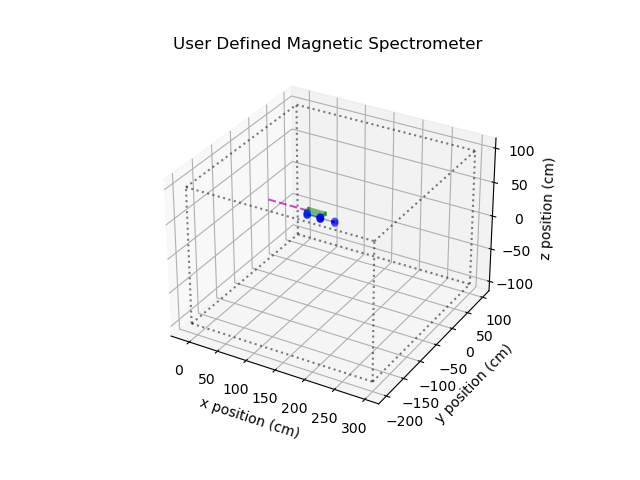

Button(description='Save Inputs', icon='check', layout=Layout(height='80px', width='50%'), style=ButtonStyle()…

Inputs saved and exported!


In [44]:
units = [units_length.value, ' ', units_energy.value, ' ', units_angles.value, ' ', units_magnetic_field.value]
init_types = [f'{init_position.value}', ' ', f'{init_energy.value}', ' ', f'{init_divergence.value}']

convert_beam_direction, convert_divergence_spread, convert_screen_angles = convertAngles(units, beam_direction_widgets, 
                                                                                         beam_divergence_spread_widgets, 
                                                                                         screen_angles_widgets)
%matplotlib notebook
DisplayAndOutput(global_bounds, units, number_of_magnets.value, magnet_dimensions_widgets, permanent_dimension_widgets, 
                 magnet_position_widgets, magnetic_field_values_widgets, magnetic_field_axes_widgets, 
                 number_of_particles.value, beam_start_position_widgets, beam_energy, convert_beam_direction, 
                 beam_position_spread_widgets, beam_energy_spread, convert_divergence_spread, number_of_screens.value, 
                 screen_dimensions_widgets, screen_position_widgets, convert_screen_angles, init_types, particle_species, dipole_field_type_widget)

## Genetic Algorithm

In [21]:
genetic_algorithm_setup(global_bounds, number_of_magnets.value, number_of_screens.value, units_length.value,
                        magnetic_field_values_widgets)

Label(value='Do you want to use the genetic algorithm? ')

Button(description='Yes', icon='check', style=ButtonStyle())

Label(value='The genetic algorithm has access to mutate:')

Label(value='Magnet position')

Label(value='Screen position')

Label(value='Screen angles')

Label(value='Click below to save and output selection')

Button(description='Save Checked Boxes', icon='check', layout=Layout(height='80px', width='50%'), style=Button…

Choices saved and exported!
Choices saved and exported!
Choices saved and exported!
